In [1]:
import numpy as np

placa_ancho, placa_largo = 50, 50
max_iter_tiempo = 750
alpha = 5
delta_x = 1
delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)

# Condiciones de borde
u_arriba, u_der = 100.0, 100.0
u_abajo, u_izq = 50.0, 50.0

# Condición inicial interior
u_inicial = 0

In [2]:
def inicializar_u(max_iter_time, 
                  ni=placa_largo, nj=placa_ancho):
    
    # Inicializar la solución: grilla u(k, i, j)
    u = np.full((max_iter_tiempo, ni, nj), u_inicial)

    # Establecer condiciones de borde
    u[:, 0, :] = u_izq + np.arange(ni) * delta_x * (u_arriba - u_izq) / placa_ancho
    u[:, :, 0] = u_izq - (np.arange(ni) * delta_x * u_izq / placa_largo)
    u[:, -1, :] = np.arange(ni) * delta_x * u_abajo / placa_ancho
    u[:, :, -1] = u_arriba - (np.arange(nj) * delta_x * u_abajo / placa_largo)

    return u

In [3]:
# Código original para calcular el mapa de calor en la grilla (i, j) y en cada tiempo k
def calcular(u):
    nk, ni, nj = u.shape
    for k in range(0, nk-1):
        for i in range(1, ni-1):
            for j in range(1, nj-1):
                u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) \
                                 + u[k][i][j]
    return u

In [4]:
u1 = calcular(inicializar_u(max_iter_tiempo))

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
matplotlib.rcParams.update({"text.usetex": True})

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
mappable = ax.imshow(u1[0], interpolation=None,
                     cmap=plt.cm.jet)
fig.colorbar(mappable, label="Temperatura (°C)", ax=ax)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
fig.suptitle("Temperatura inicial")
fig.tight_layout()
fig.savefig("temp-inicial-0.pdf")
plt.close()

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
mappable = ax.imshow(u1[-1], interpolation=None,
                     cmap=plt.cm.jet)
fig.colorbar(mappable, label="Temperatura (°C)", ax=ax)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
fig.suptitle("Temperatura final")
fig.tight_layout()
fig.savefig("temp-final-0.pdf")
plt.close()

In [9]:
def plotheatmap(u_k, k):
    # Limpiamos la figura
    plt.clf()

    plt.title(f"Temperatura en t = {k*delta_t:.2f} unidades de tiempo")
    plt.xlabel(r"$x$", fontsize=20)
    plt.ylabel(r"$y$", fontsize=20)

    # Ploteamos u_k (u_{i,j} en `paso de tiempo k)
    plt.imshow(u_k, cmap=plt.cm.jet, interpolation="none", vmin=0, vmax=100)
    plt.colorbar()

    return plt

¡Hecho!


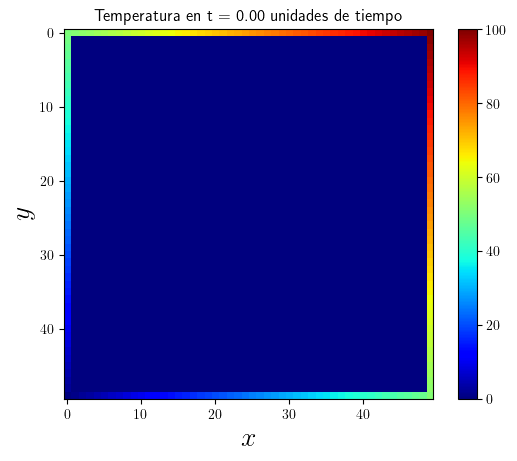

In [10]:
def animate(k):
    plotheatmap(u1[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=50, frames=max_iter_tiempo, repeat=False)
anim.save("solucion_ecuacion_calor_n-0.mp4")

print("¡Hecho!")